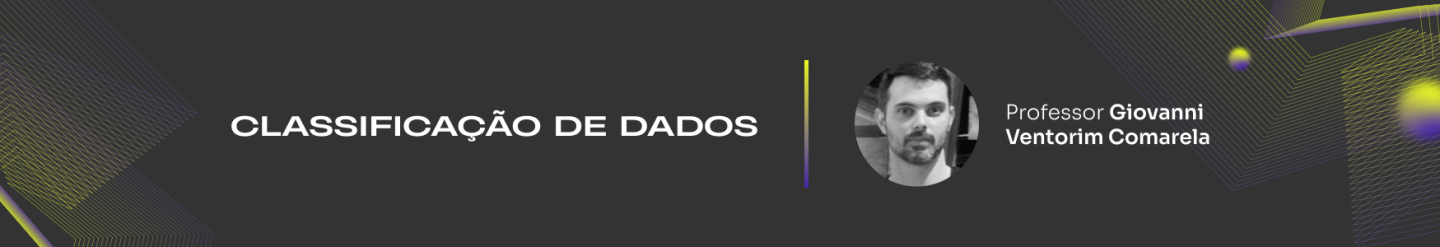

# Introdução à Classificação

Classificação é uma tarefa de Aprendizado Supervisionado, onde o objetivo é **aprender** a partir de dados **rotulados**.

Nesse contexto:
1. O que significa **aprender**?
2. O que são dados **rotulados**?

Vamos ilustrar esses conceitos com a ajuda de dois exemplos da biblioteca[`scikit-learn`](https://scikit-learn.org/) (veremos mais sobre essa biblioteca nas próximas aulas).




## Exemplo I - Reconhecimento de Dígitos

No nosso primeiro exemplo, vamos usar um conjunto de dados relacionado à tarefa de [reconhecimento de dígitos](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

In [ ]:
#@title Importando módulos necessários
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()

In [ ]:
digits = datasets.load_digits(return_X_y = False, as_frame = True)

O conjunto de dados é compostor por duas partes.

A primeira parte é uma matriz $\mathbf{X}$, onde cada linha de $\mathbf{X}$ possui 64 valores, representando uma imagem $8\times 8$ em escala de cinza.

In [ ]:
X = digits.data
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Em outras palavras, cada linha da matriz representa uma imagem, como as mostradas abaixo.

A segunda parte do conjunto de dados, denotada por $\mathbf{y}$, representa os dígitos reais referente às imagens contidas na matriz $\mathbf{X}$.

In [ ]:
y = digits.target.values
y

array([0, 1, 2, ..., 8, 9, 8])

A correspondência entre $\mathbf{X}$ e $\mathbf{y}$ é ilustrada abaixo.

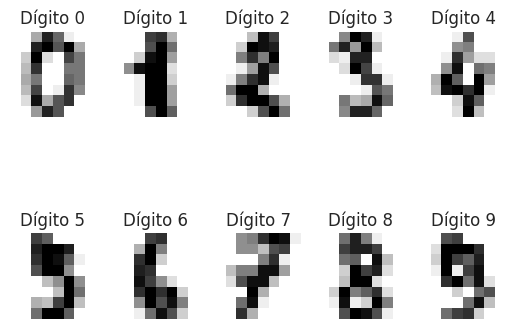

In [ ]:
#@title Correspondência entre imagens e dígitos reais
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Dígito %i' % label)

Nesse contexto, o objetivo da tarefa de aprendizado supervisionado é utilizar os dados disponibilizados ($\mathbf{X}$ e $\mathbf{y}$ -- imagens e dígitos reais) para encontrar uma forma de mapear as imagens para os dígitos correspondentes corretamente!

Para este exemplo, os dígitos são os **rótulos** do conjunto de dados.



## Exemplo II - Classificação de Vinhos

No segundo exemplo, olharemos para uma tarefa de [classificação de vinhos](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html).

Na primeira parte do conjunto de dados, a matriz $\mathbf{X}$ contém várias amostras de vinhos, representadas nas linhas da matriz. Cada uma das 13 colunas de $\mathbf{X}$ representa uma **característica** dos vinhos analisados.

In [ ]:
wine = datasets.load_wine(return_X_y = False, as_frame = True)
X = wine.data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Similarmente ao Exemplo I, cada amostra está relacionada a um tipo de vinho específico. Nesse conjunto de dados, há três tipos de vinhos, os quais estão representados em $\mathbf{y}$.

In [ ]:
y = wine.target.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Assim, a tarefa de interesse seria utilizar esses dados para criar uma forma de mapear uma amostra de vinho (de acordo com as 13 características obtidas) para um dos três tipos de vinho (rótulos).

## Formalização da Tarefa de Classificação

### Entrada

Como motivado nos exemplos acima, a entrada de uma tarefa de classificação é um conjunto de dados contendo uma matriz real, $\mathbf{X}$, com $n$ linhas e $d$ colunas, e um vetor de valores discretos, $\mathbf{y}$. Ilustrando, temos
$$\mathbf{X} = \begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1d} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nd}
\end{bmatrix}
\ \ \ \ \text{ e }\ \ \ \ \ \mathbf{y} = \begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix},
$$
onde:
* Cada linha de $\mathbf{X}$ representa um **objeto** de interesse (e.g., uma imagem de um dígito ou uma amostra de vinho);
* Cada coluna de $\mathbf{X}$ representa uma **característica** dos objetos (e.g., a cor de um píxel ou uma medida de amostra de vinho); e
* A $i$-ésima linha de $\mathbf{X}$ possui **rótulo** $y_i$.


É comum ver na literatura $\mathbf{X}$ e $\mathbf{y}$ representados como um conjunto de pares ordenados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, onde:
- $\mathbf{x}_i$ é o vetor que representa a $i$-ésima linha de $\mathbf{X}$; e
- $y_i$ é o rótulo de $\mathbf{x}_i$.

### Saída

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar uma função $f$ que aprenda dos **objetos** os **rótulos**.

Qualquer função $f$ serve? **Não**! Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$, não pertencente ao conjunto $D$, for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

## Terminologia

Em aprendizado de máquina, muitas vezes faz-se uso de vários termos para se referir aos conceitos apresentados. Alguns destaques a seguir.

Cada $\mathbf{x}_i$ ($i$-ésima linha de $\mathbf{X}$) é comumente chamada de:
- objeto;
- item;
- instância; ou
- vetor de características (*feature vector*)

Cada **coluna** coluna de $\mathbf{X}$ é comumente chamada de:
- característica (*feature*); ou
- atributo

Cada **objeto** está associado a um valor discreto. Esse valor é comumente chamado de:
- rótulo; ou
- classe

Por fim, a função $f$ muitas vezes é chamada de:
- Modelo
- Modelo de Classificação
- Classificador

## Em resumo

O objetivo dessa disciplina é aprender como construir bons classificadores a partir de conjuntos de dados rotulados.

Revisitando as perguntas do início:
1. O que significa **aprender**? No contexto de classificação, aprender é utilizar um conjunto de dados para encontrar um modelo que seja capaz de mapear as instâncias aos seus respectivos rótulos.
2. O que são dados **rotulados**? É um conjunto de dados em que cada objeto (um vetor de características) é associado a um valor discreto (geralmente pertencente a um pequeno conjunto).

Lembrando. Um classificador é bom quando:
- é capaz de aprender os rótulos dos objetos do conjunto de dados; e
- é capaz de computar os rótulos de objetos que não estão no conjunto de dados.